In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [18]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=13, noise=15)

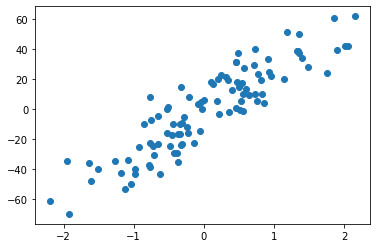

In [19]:
plt.scatter(X,y)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.7731454]
-1.721058419007734


In [21]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.90535463]
-1.5535582416387421


In [22]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.90888246]
-0.8528755991559487


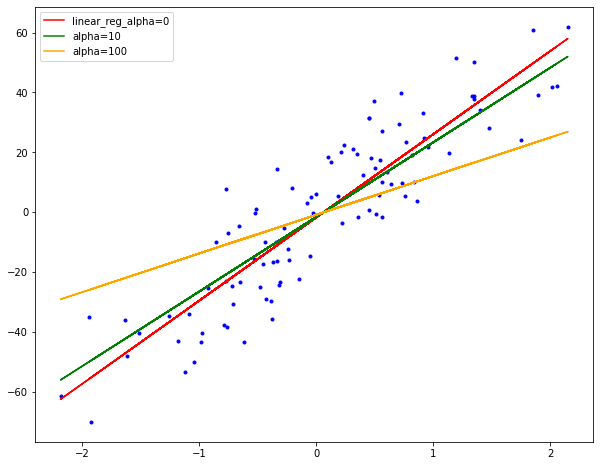

In [25]:
#Plotting Graph
plt.figure(figsize = (10,8))
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='linear_reg_alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [27]:
from sklearn.linear_model import RidgeCV
rr_cv = RidgeCV(alphas=(0.001, 100, 10))
rr_cv.fit(X,y)

RidgeCV(alphas=array([1.e-03, 1.e+02, 1.e+01]))

In [29]:
print(rr_cv.alpha_)
print(rr_cv.intercept_)
print(rr_cv.coef_)

0.001
-1.7210397404942324
[27.7728256]


In [30]:
#Making Ridge Regression for 2D data

class MeraRidge:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
    
    def fit(self, X, y):
        num = 0
        den = 0
        X_mean = X.mean()
        y_mean = y.mean()
        
        for i in range(X.shape[0]):
            num = num + (y[i] - y_mean)*(X[i] - X_mean)
            den = den + (X[i] - X_mean)**2
            
        self.m = num/(den + 2*self.alpha)
        
        self.b = y_mean - self.m*X_mean
    
    def coef_(self):
        return self.m
    
    def intercept_(self):
        return self.b
    
    def predict(self, X_test):
        return self.b + self.m*X_test
    
        

In [31]:
rd = MeraRidge(alpha=0.001)


In [32]:
rd.fit(X,y)

In [33]:
rd.intercept_()

array([-1.72102106])

In [34]:
rd.coef_()

array([27.77250581])